In [ ]:
# ✅ 한글 폰트 설치 (NanumGothic)
!apt-get update -qq
!apt-get install -y fonts-nanum

# ✅ matplotlib 폰트 캐시 삭제
import os
os.system('rm -rf ~/.cache/matplotlib')

print("✅ 폰트 설치 완료! 이제 런타임 > 다시 시작(ctrl+M+.) 을 꼭 해주세요.")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
✅ 폰트 설치 완료! 이제 런타임 > 다시 시작(ctrl+M+.) 을 꼭 해주세요.


In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'NanumGothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 경고 뜨지 않게
import warnings
warnings.filterwarnings('ignore')

#저장라이브러리
import pickle

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# LabelEncoder
from sklearn.preprocessing import LabelEncoder

# 데이터를 학습용과 검증용으로 나눈다.
from sklearn.model_selection import train_test_split

import os


In [3]:
df_01 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/2020-Jan.csv')
df_01

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-01-01 00:00:00 UTC,view,1005073,2232732093077520756,construction.tools.light,samsung,1130.02,519698804,69b5d72f-fd6e-4fed-aa23-1286b2ca89a0
1,2020-01-01 00:00:01 UTC,view,1005192,2232732093077520756,construction.tools.light,meizu,205.67,527767423,7f596032-ccbf-4643-9bad-e36a209512b4
2,2020-01-01 00:00:01 UTC,view,100063693,2053013552427434207,apparel.shirt,turtle,136.43,519046195,d1e2f343-84bb-49bd-b13d-ca0f1ed9910e
3,2020-01-01 00:00:01 UTC,view,5100816,2232732103831716449,apparel.shoes,xiaomi,29.95,518269232,0444841c-38ef-410c-b11f-7b35ea4e5991
4,2020-01-01 00:00:02 UTC,view,100014325,2232732103294845523,apparel.shoes.step_ins,intel,167.20,587748686,31b7d4cf-dfac-4895-9927-90fa3254f860
...,...,...,...,...,...,...,...,...,...
55967036,2020-01-31 23:59:59 UTC,view,5100833,2232732103831716449,apparel.shoes,xiaomi,33.72,517548219,37af3593-a086-4ad8-b6e5-8f87370d91e3
55967037,2020-01-31 23:59:59 UTC,view,1005239,2232732093077520756,construction.tools.light,xiaomi,228.83,512985520,4d185c67-1425-4f89-904e-bd156c840702
55967038,2020-01-31 23:59:59 UTC,view,100043202,2053013556521075159,apparel.shoes,respect,47.36,513043451,4d614d05-3b0c-4504-a75e-9e09715f737f
55967039,2020-01-31 23:59:59 UTC,view,2900565,2232732102103663163,furniture.bedroom.blanket,midea,51.30,581011571,a60355b0-eb87-4d42-a9ca-d4032c5b1ef5


### 데이터 구조 확인

In [ ]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67542878 entries, 0 to 67542877
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.5+ GB


In [ ]:
df_01['event_type'].value_counts()

,count
event_type,
view,62986067
cart,3394763
purchase,1162048


### 카테고리 갯수 확인

In [ ]:
df_01['category_id'].value_counts()

,count
category_id,
2232732093077520756,16259284
2232732099754852875,2097755
2232732079706079299,2007297
2053013554658804075,1374333
2053013553199186187,1311399
...,...
2160098698049093979,1
2192201207496311139,1
2053013559935238815,1


### 제품갯수 확인

### 카테고리 분류를 만들 수 있는 경우 값이 있음(없다면 NaN)

In [ ]:
df_01['category_code'].value_counts()

,count
category_code,
construction.tools.light,16519261
electronics.clocks,2740539
appliances.personal.massager,2613517
apparel.shoes,2543026
appliances.kitchen.refrigerators,2401372
...,...
appliances.environment.fan,5354
appliances.kitchen.microwave,3615
computers.components.sound_card,3470


### 브랜드는 약 4637개 있는 것으로 확인

In [ ]:
df_01['brand'].value_counts()

,count
brand,
samsung,8540399
apple,5594757
xiaomi,5208639
huawei,1903123
lucente,1269502
...,...
fibos,1
xkg,1
koowheel,1


### 세션 컬럼 확인

In [ ]:
df_01[['event_time', 'user_session']].value_counts()

KeyboardInterrupt: 

### 컬럼별 결측치 비율 확인

In [ ]:
# 결측치 비율 계산
missing_ratio = df_01.isnull().mean().sort_values(ascending=False)

# 결측치 비율이 있는 컬럼만 보기 (선택사항)
missing_ratio = missing_ratio[missing_ratio > 0]

# 결과 출력
print("결측치 비율 (%):")
print((missing_ratio * 100).round(2))

결측치 비율 (%):
brand            12.03
category_code    10.50
user_session      0.00
dtype: float64


In [ ]:
df_01.isna().sum()

,0
event_time,0
event_type,0
product_id,0
category_id,0
category_code,7088848
brand,8122410
price,0
user_id,0
user_session,21


### 날짜형식 변환

In [4]:
# datetime 형식으로 되어 있어야 함
df_01['event_time'] = pd.to_datetime(df_01['event_time'])

# event_date를 datetime으로 변환 (안정성 확보)
df_01['event_date'] = pd.to_datetime(df_01['event_time'].dt.date)

# 시간 컬럼 생성 (00시 단위까지만)
df_01['event_hour'] = df_01['event_time'].dt.hour

df_01

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour
0,2020-01-01 00:00:00+00:00,view,1005073,2232732093077520756,construction.tools.light,samsung,1130.02,519698804,69b5d72f-fd6e-4fed-aa23-1286b2ca89a0,2020-01-01,0
1,2020-01-01 00:00:01+00:00,view,1005192,2232732093077520756,construction.tools.light,meizu,205.67,527767423,7f596032-ccbf-4643-9bad-e36a209512b4,2020-01-01,0
2,2020-01-01 00:00:01+00:00,view,100063693,2053013552427434207,apparel.shirt,turtle,136.43,519046195,d1e2f343-84bb-49bd-b13d-ca0f1ed9910e,2020-01-01,0
3,2020-01-01 00:00:01+00:00,view,5100816,2232732103831716449,apparel.shoes,xiaomi,29.95,518269232,0444841c-38ef-410c-b11f-7b35ea4e5991,2020-01-01,0
4,2020-01-01 00:00:02+00:00,view,100014325,2232732103294845523,apparel.shoes.step_ins,intel,167.20,587748686,31b7d4cf-dfac-4895-9927-90fa3254f860,2020-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...
55967036,2020-01-31 23:59:59+00:00,view,5100833,2232732103831716449,apparel.shoes,xiaomi,33.72,517548219,37af3593-a086-4ad8-b6e5-8f87370d91e3,2020-01-31,23
55967037,2020-01-31 23:59:59+00:00,view,1005239,2232732093077520756,construction.tools.light,xiaomi,228.83,512985520,4d185c67-1425-4f89-904e-bd156c840702,2020-01-31,23
55967038,2020-01-31 23:59:59+00:00,view,100043202,2053013556521075159,apparel.shoes,respect,47.36,513043451,4d614d05-3b0c-4504-a75e-9e09715f737f,2020-01-31,23
55967039,2020-01-31 23:59:59+00:00,view,2900565,2232732102103663163,furniture.bedroom.blanket,midea,51.30,581011571,a60355b0-eb87-4d42-a9ca-d4032c5b1ef5,2020-01-31,23


In [ ]:
df_01.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session',
       'event_date', 'event_hour'],
      dtype='object')

In [ ]:
# 제품군 분포
product_group_dist = df_01['category_code'].value_counts(dropna=False)

for i in product_group_dist.index:
  print(i)


construction.tools.light
nan
electronics.clocks
appliances.personal.massager
apparel.shoes
appliances.kitchen.refrigerators
sport.bicycle
appliances.environment.vacuum
computers.peripherals.printer
electronics.audio.headphone
apparel.shoes.sandals
appliances.kitchen.washer
kids.toys
apparel.shoes.keds
electronics.smartphone
furniture.bedroom.blanket
apparel.shoes.slipons
construction.components.faucet
sport.ski
appliances.kitchen.coffee_grinder
apparel.scarf
sport.trainer
accessories.bag
computers.notebook
electronics.video.tv
furniture.bedroom.bed
computers.desktop
apparel.underwear
apparel.costume
apparel.shorts
furniture.kitchen.table
apparel.shirt
construction.tools.welding
furniture.living_room.sofa
appliances.kitchen.oven
apparel.shoes.moccasins
kids.skates
electronics.audio.subwoofer
auto.accessories.compressor
electronics.camera.video
furniture.kitchen.chair
computers.components.cooler
appliances.kitchen.grill
appliances.kitchen.blender
accessories.wallet
appliances.kitchen.tos

### 카테고리 코드 컬럼 확인해보니 .으로 카테고리 구분이 가능할거 같아서 잘라봄
> Depth가 다를 수도 있는데 없는 부분은 NaN으로 표기


In [5]:
# .으로 나눈 컬럼 생성 (최대 4단계까지 가정)
category_split = df_01['category_code'].str.split('.', expand=True)

# 새로운 컬럼 이름 지정
category_split.columns = ['category_lvl1', 'category_lvl2', 'category_lvl3', 'category_lvl4']

# 기존 df에 병합
df = pd.concat([df_01, category_split], axis=1)
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4
0,2020-01-01 00:00:00+00:00,view,1005073,2232732093077520756,construction.tools.light,samsung,1130.02,519698804,69b5d72f-fd6e-4fed-aa23-1286b2ca89a0,2020-01-01,0,construction,tools,light,None
1,2020-01-01 00:00:01+00:00,view,1005192,2232732093077520756,construction.tools.light,meizu,205.67,527767423,7f596032-ccbf-4643-9bad-e36a209512b4,2020-01-01,0,construction,tools,light,None
2,2020-01-01 00:00:01+00:00,view,100063693,2053013552427434207,apparel.shirt,turtle,136.43,519046195,d1e2f343-84bb-49bd-b13d-ca0f1ed9910e,2020-01-01,0,apparel,shirt,None,None
3,2020-01-01 00:00:01+00:00,view,5100816,2232732103831716449,apparel.shoes,xiaomi,29.95,518269232,0444841c-38ef-410c-b11f-7b35ea4e5991,2020-01-01,0,apparel,shoes,None,None
4,2020-01-01 00:00:02+00:00,view,100014325,2232732103294845523,apparel.shoes.step_ins,intel,167.20,587748686,31b7d4cf-dfac-4895-9927-90fa3254f860,2020-01-01,0,apparel,shoes,step_ins,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55967036,2020-01-31 23:59:59+00:00,view,5100833,2232732103831716449,apparel.shoes,xiaomi,33.72,517548219,37af3593-a086-4ad8-b6e5-8f87370d91e3,2020-01-31,23,apparel,shoes,None,None
55967037,2020-01-31 23:59:59+00:00,view,1005239,2232732093077520756,construction.tools.light,xiaomi,228.83,512985520,4d185c67-1425-4f89-904e-bd156c840702,2020-01-31,23,construction,tools,light,None
55967038,2020-01-31 23:59:59+00:00,view,100043202,2053013556521075159,apparel.shoes,respect,47.36,513043451,4d614d05-3b0c-4504-a75e-9e09715f737f,2020-01-31,23,apparel,shoes,None,None
55967039,2020-01-31 23:59:59+00:00,view,2900565,2232732102103663163,furniture.bedroom.blanket,midea,51.30,581011571,a60355b0-eb87-4d42-a9ca-d4032c5b1ef5,2020-01-31,23,furniture,bedroom,blanket,None


In [ ]:
df['category_lvl1'].value_counts()

,count
category_lvl1,
construction,18454642
appliances,11777982
apparel,9091468
electronics,7457408
sport,3660671
computers,3363857
furniture,3177912
kids,1761900
accessories,903204


In [ ]:
# 필요한 이벤트만 필터링
df_filtered = df[df['event_type'].isin(['purchase', 'view', 'cart'])]

# category_lvl1 기준으로 event_type별 건수 집계
category_event_counts = df_filtered.groupby(['category_lvl1', 'event_type']).size().unstack(fill_value=0)

# 보기 좋게 정렬
category_event_counts = category_event_counts.sort_values(by='purchase', ascending=False)


### 카테고리 유형별 event_type 현황

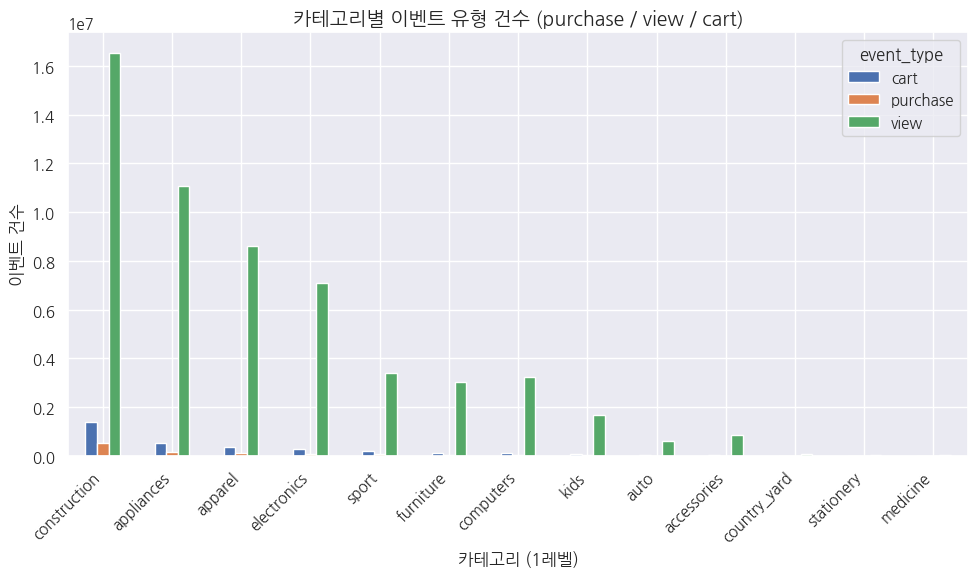

In [ ]:
import matplotlib.pyplot as plt

# 스타일 적용
fig, ax = plt.subplots(figsize=(10, 6))

# stacked bar chart (or use side-by-side if preferred)
category_event_counts.plot(kind='bar', stacked=False, ax=ax)

# 제목/라벨 설정
ax.set_title('카테고리별 이벤트 유형 건수 (purchase / view / cart)', fontsize=14)
ax.set_xlabel('카테고리 (1레벨)', fontsize=12)
ax.set_ylabel('이벤트 건수', fontsize=12)
ax.legend(title='event_type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 평균 재구매 간격

In [ ]:
# 1. 구매 이벤트만 추출
df_buy = df[df['event_type'] == 'purchase'].copy()

# 2. 시간순 정렬
df_buy.sort_values(by=['user_id', 'product_id', 'event_time'], inplace=True)

# 3. 이전 구매 시간 계산
df_buy['prev_purchase_time'] = df_buy.groupby(['user_id', 'product_id'])['event_time'].shift(1)

# 4. 구매 간 시간 차이 계산 (단위: 일)
df_buy['repurchase_gap_days'] = (df_buy['event_time'] - df_buy['prev_purchase_time']).dt.total_seconds() / (60 * 60 * 24)


In [ ]:
df_repurchase = df_buy[df_buy['repurchase_gap_days'].notnull()]

In [ ]:
# 전체 평균 재구매 주기
mean_gap = df_repurchase['repurchase_gap_days'].mean()

# 유저별 평균 재구매 간격
user_gap = df_repurchase.groupby('user_id')['repurchase_gap_days'].mean().reset_index()

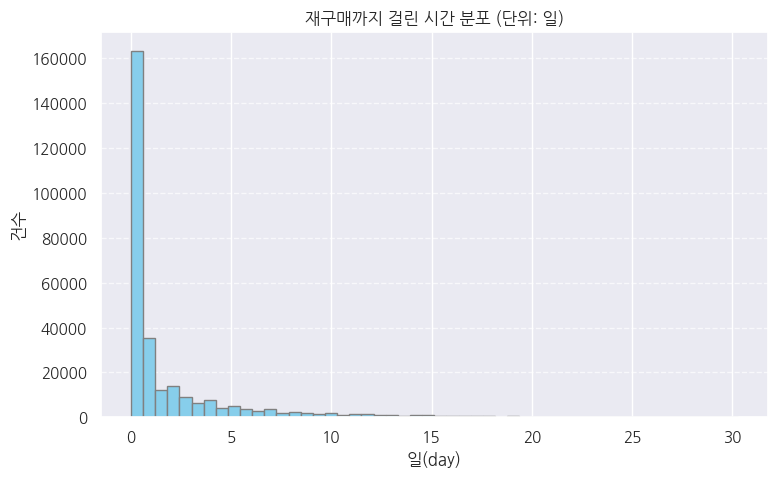

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df_repurchase['repurchase_gap_days'], bins=50, color='skyblue', edgecolor='gray')
plt.title('재구매까지 걸린 시간 분포 (단위: 일)')
plt.xlabel('일(day)')
plt.ylabel('건수')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Lv1 카테고리의 평균 재구매 기간

In [ ]:
# 1. 구매 이벤트만 필터링
df_buy = df[df['event_type'] == 'purchase'].copy()

# 2. 시간순 정렬
df_buy.sort_values(by=['user_id', 'product_id', 'event_time'], inplace=True)

# 3. 이전 구매 시간
df_buy['prev_time'] = df_buy.groupby(['user_id', 'product_id'])['event_time'].shift(1)

# 4. 재구매 시간 차이 계산 (일 단위)
df_buy['repurchase_gap_days'] = (df_buy['event_time'] - df_buy['prev_time']).dt.total_seconds() / (60 * 60 * 24)

# 5. 재구매가 존재하는 경우만 필터
df_repurchase = df_buy[df_buy['repurchase_gap_days'].notnull()]


In [ ]:
# category_lvl1 기준 평균/중앙값 재구매일 계산
category_gap = df_repurchase.groupby('category_lvl1')['repurchase_gap_days'].agg(['count', 'mean', 'median']).reset_index()

# 보기 좋게 정렬
category_gap = category_gap.sort_values(by='mean')


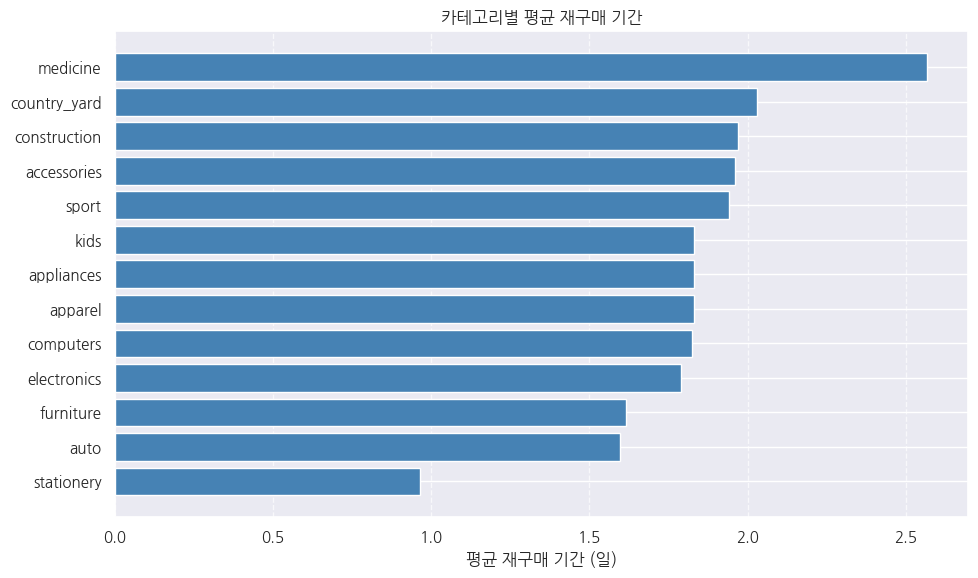

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(category_gap['category_lvl1'], category_gap['mean'], color='steelblue')
plt.xlabel('평균 재구매 기간 (일)')
plt.title('카테고리별 평균 재구매 기간')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 세션별 구매율보기

In [ ]:
# 세션당 구매 발생 여부(True/False)
session_purchased = df.groupby('user_session')['event_type'].apply(lambda x: 'purchase' in x.values)

# 데이터프레임으로 변환
session_purchased_df = session_purchased.reset_index().rename(columns={'event_type': 'has_purchase'})

In [ ]:
# 전환된 세션 수
num_converted_sessions = session_purchased_df['has_purchase'].sum()

# 전체 세션 수
total_sessions = len(session_purchased_df)

# 전환율 계산
conversion_rate = num_converted_sessions / total_sessions * 100

print(f"총 세션 수: {total_sessions}")
print(f"구매 전환된 세션 수: {num_converted_sessions}")
print(f"세션당 구매 전환율: {conversion_rate:.2f}%")


총 세션 수: 15581360
구매 전환된 세션 수: 970005
세션당 구매 전환율: 6.23%


In [ ]:
# 세션별 첫 category_lvl1 값
session_main_category = df.sort_values(['user_session', 'event_time']) \
                          .drop_duplicates('user_session')[['user_session', 'category_lvl1']]

In [ ]:
# 병합
session_stats = session_purchased_df.merge(session_main_category, on='user_session', how='left')

# 카테고리별 전환율 계산
category_conversion = session_stats.groupby('category_lvl1')['has_purchase'].mean().sort_values(ascending=False) * 100


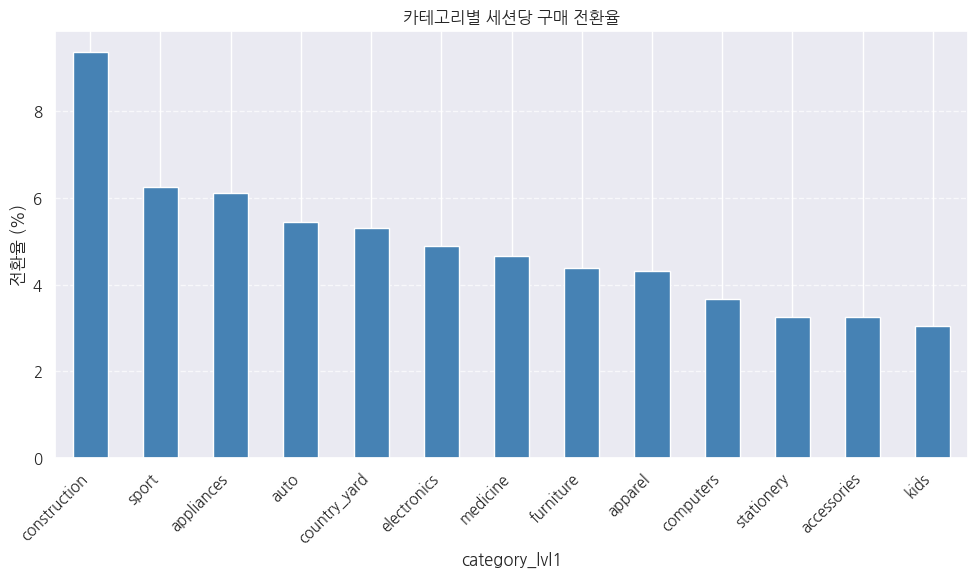

In [ ]:
plt.figure(figsize=(10,6))
category_conversion.plot(kind='bar', color='steelblue')
plt.ylabel('전환율 (%)')
plt.title('카테고리별 세션당 구매 전환율')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- 건설/자재 관련 제품군이 가장 높은 전환율을 보임(방문 > 구매로 이어질 가능성 높음)
- 스포츠용품, 가전, 자동차용품은 비교적 전환울 높음
- electronics, medicine : 탐색/리뷰 비교하는 과정이 많음
- omputers, stationery, accessories, kids :많이 보기는 하지만 구매 전환은 낮음

# 카테고리별 재구매율이 높은 문구류를 기준으로 재구매율 확인
> 문구류 구매자 중 재구매한 유저 비율 확인

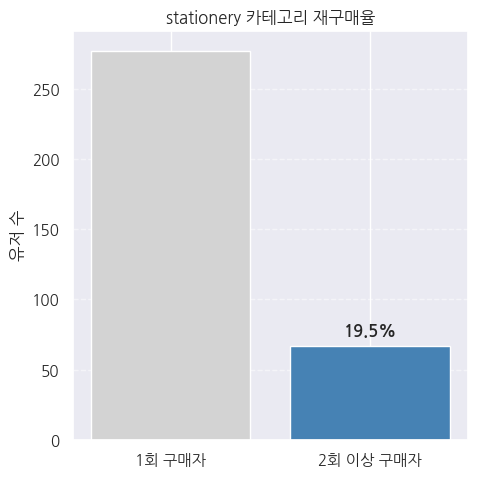

In [ ]:
# 1. 구매 이벤트 중 stationery 카테고리만 추출
df_stationery_buy = df[(df['event_type'] == 'purchase') & (df['category_lvl1'] == 'stationery')].copy()

# 2. 유저별 구매 횟수 계산
buy_counts = df_stationery_buy.groupby('user_id')['product_id'].count()

# 3. 재구매자 비율 계산
num_buyers = len(buy_counts)
num_repeat_buyers = (buy_counts >= 2).sum()
repurchase_rate = num_repeat_buyers / num_buyers * 100

# 4. 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.bar(['1회 구매자', '2회 이상 구매자'], [num_buyers - num_repeat_buyers, num_repeat_buyers], color=['lightgray', 'steelblue'])
plt.title('stationery 카테고리 재구매율')
plt.ylabel('유저 수')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.text(1, num_repeat_buyers + 5, f'{repurchase_rate:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


# 카테고리 중 일부(문구류) 장바구니 추가 -> 구매 전환율 비교

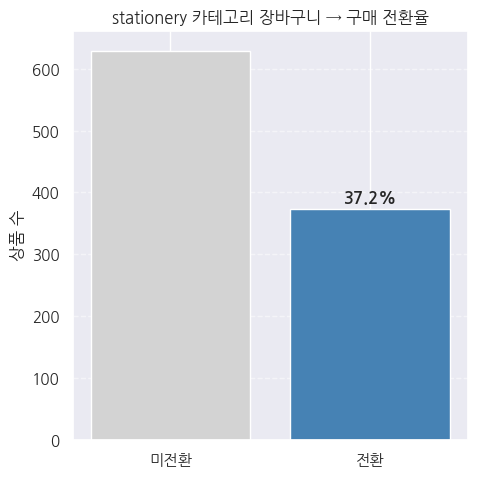

In [ ]:
# 1. stationery 관련 cart & purchase 이벤트 추출
df_stationery = df[df['category_lvl1'] == 'stationery']

# 2. 유저별로 해당 제품을 장바구니(cart) → 구매(purchase) 했는지 체크
# user_id + product_id 기준으로 cart와 purchase 여부 확인
cart_df = df_stationery[df_stationery['event_type'] == 'cart'][['user_id', 'product_id']].drop_duplicates()
purchase_df = df_stationery[df_stationery['event_type'] == 'purchase'][['user_id', 'product_id']].drop_duplicates()

# 3. 장바구니 상품 중 구매로 이어진 경우 추출
cart_df['carted'] = 1
merged = cart_df.merge(purchase_df, on=['user_id', 'product_id'], how='left', indicator=True)
merged['purchased'] = (merged['_merge'] == 'both').astype(int)

# 4. 전환율 계산
cart_total = len(merged)
cart_to_purchase = merged['purchased'].sum()
conversion_rate = cart_to_purchase / cart_total * 100

# 5. 시각화
plt.figure(figsize=(5,5))
plt.bar(['미전환', '전환'], [cart_total - cart_to_purchase, cart_to_purchase], color=['lightgray', 'steelblue'])
plt.title('stationery 카테고리 장바구니 → 구매 전환율')
plt.ylabel('상품 수')
plt.text(1, cart_to_purchase + 5, f'{conversion_rate:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 유저 유형별 비교

In [ ]:
# 구매 데이터만 추출
df_buy = df[df['event_type'] == 'purchase'].copy()

# 시간 순 정렬
df_buy = df_buy.sort_values(by=['user_id', 'product_id', 'event_time'])

# 유저-상품별 이전 구매시간 계산
df_buy['prev_time'] = df_buy.groupby(['user_id', 'product_id'])['event_time'].shift(1)

# 재구매 간격 계산 (일 단위)
df_buy['repurchase_gap'] = (df_buy['event_time'] - df_buy['prev_time']).dt.total_seconds() / (60 * 60 * 24)

# 유저별 총 구매 횟수 계산
user_purchase_count = df_buy.groupby('user_id').size().rename('total_purchases')

# 유저별 재구매 횟수 (gap이 있는 경우만)
user_repurchase_count = df_buy[df_buy['repurchase_gap'].notnull()].groupby('user_id').size().rename('repurchase_count')

# 유저별 평균 재구매 간격
user_repurchase_gap = df_buy[df_buy['repurchase_gap'].notnull()].groupby('user_id')['repurchase_gap'].mean().rename('avg_repurchase_gap')

# 병합
user_summary = pd.concat([user_purchase_count, user_repurchase_count, user_repurchase_gap], axis=1).fillna(0)

# 유저 유형 분류 (총 구매 기준)
def classify_user(n):
    if n == 1:
        return '1회 구매자'
    elif 2 <= n <= 3:
        return '2~3회 구매자'
    elif 4 <= n <= 6:
        return '4~6회 구매자'
    else:
        return '7회 이상 구매자'

user_summary['user_type'] = user_summary['total_purchases'].apply(classify_user)

# 유저 유형별 평균 재구매 횟수 및 간격
grouped_stats = user_summary.groupby('user_type')[['repurchase_count', 'avg_repurchase_gap']].mean()

# 순서 정렬
user_type_order = ['1회 구매자', '2~3회 구매자', '4~6회 구매자', '7회 이상 구매자']
grouped_stats = grouped_stats.loc[user_type_order]


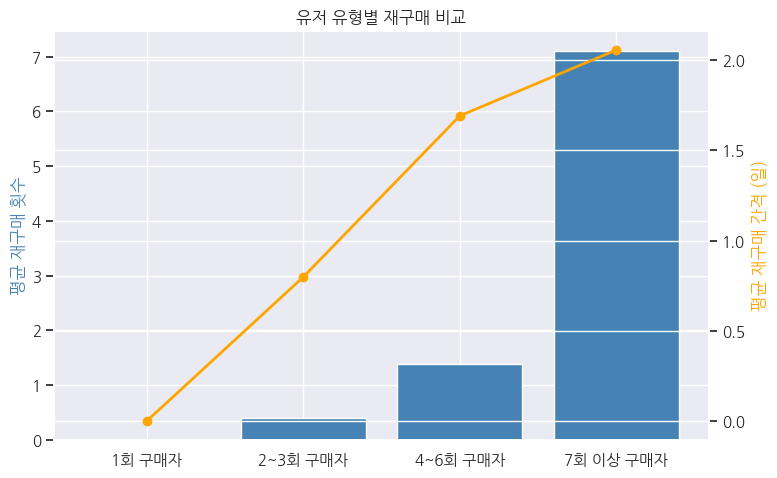

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,5))

# 막대: 평균 재구매 횟수
ax1.bar(grouped_stats.index, grouped_stats['repurchase_count'], color='steelblue', label='재구매 횟수')
ax1.set_ylabel('평균 재구매 횟수', color='steelblue')

# 선: 평균 재구매 간격 (오른쪽 Y축)
ax2 = ax1.twinx()
ax2.plot(grouped_stats.index, grouped_stats['avg_repurchase_gap'], color='orange', marker='o', linewidth=2, label='재구매 간격')
ax2.set_ylabel('평균 재구매 간격 (일)', color='orange')

plt.title('유저 유형별 재구매 비교')
fig.tight_layout()
plt.show()


- 구매 횟수가 많을수록 재구매도 많음
- 평균 재구매 간격은 구매가 많을수록 오히려 길어지는 경향을 보임 -> 정기적 소비자일 가능성 있음

In [ ]:
# 1. 구매 이벤트 필터
df_buy = df[df['event_type'] == 'purchase'].copy()

# 2. 유저별 총 구매 횟수
user_total = df_buy.groupby('user_id').size().rename('total_purchases')

# 3. 유저 유형 분류 함수
def classify_user(n):
    if n == 1:
        return '1회 구매자'
    elif 2 <= n <= 3:
        return '2~3회 구매자'
    elif 4 <= n <= 6:
        return '4~6회 구매자'
    else:
        return '7회 이상 구매자'

# 4. 유저 유형 부여
user_type_df = user_total.reset_index()
user_type_df['user_type'] = user_type_df['total_purchases'].apply(classify_user)


In [ ]:
# 구매 로그에 user_type 추가
df_buy = df_buy.merge(user_type_df[['user_id', 'user_type']], on='user_id', how='left')


In [ ]:
# 유저 유형별 category_lvl1별 구매 횟수
category_pref = df_buy.groupby(['user_type', 'category_lvl1']).size().reset_index(name='count')


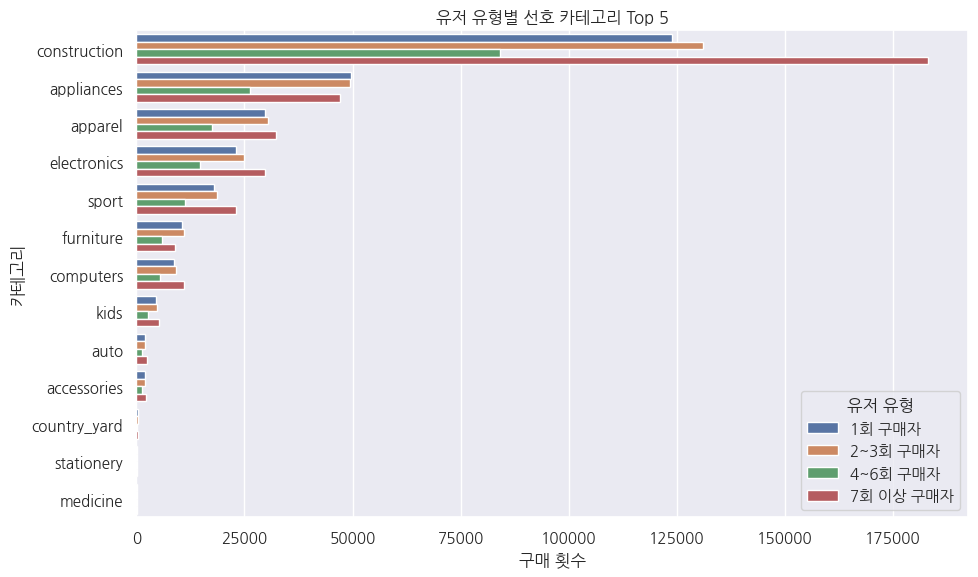

In [ ]:
# 상위 5개 카테고리만 추출 (유형별로)
top5_per_type = (
    category_pref
    .sort_values(['user_type', 'count'], ascending=[True, False])
    .groupby('user_type')
    .head(20)
)

plt.figure(figsize=(10, 6))
sns.barplot(data=top5_per_type, x='count', y='category_lvl1', hue='user_type')
plt.title('유저 유형별 선호 카테고리 Top 5')
plt.xlabel('구매 횟수')
plt.ylabel('카테고리')
plt.legend(title='유저 유형')
plt.tight_layout()
plt.show()


- 1회 구매자: construction 진입 많음 → 첫 구매 이후 7일 이내 재구매 유도
- 2~3회 구매자:	apparel, appliances로 확장 → 개인화 추천 효과적
- 4~6회 구매자:	electronics, sport 진입 시작 → 중고가 제품 추천 가능
- 7회 이상:	충성 고객, 반복 구매 중심 → 정기배송, 세트 상품, 적립 혜택 강화

In [ ]:
# 세션별 포함된 이벤트 플래그 생성
session_event_flags = df.pivot_table(index='user_session', columns='event_type',
                                     values='user_id', aggfunc='count', fill_value=0)

# 포함 여부만 추출 (0/1)
session_event_flags = (session_event_flags > 0).astype(int)

# 퍼널 단계별 수
funnel_counts = {
    'view': session_event_flags['view'].sum(),
    'cart': session_event_flags[session_event_flags['view'] == 1]['cart'].sum(),
    'purchase': session_event_flags[session_event_flags['cart'] == 1]['purchase'].sum()
}

# 전환율 계산
funnel_rates = {
    'view → cart': funnel_counts['cart'] / funnel_counts['view'] * 100,
    'cart → purchase': funnel_counts['purchase'] / funnel_counts['cart'] * 100
}

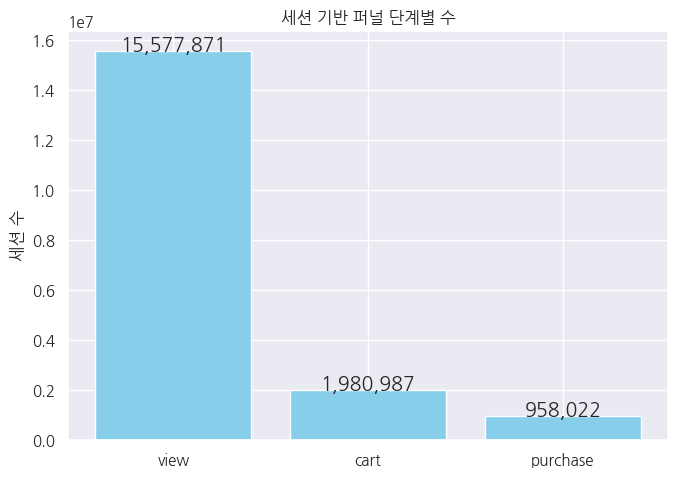

In [ ]:
stages = list(funnel_counts.keys())
counts = list(funnel_counts.values())
rates = list(funnel_rates.values())

plt.figure(figsize=(7,5))
plt.bar(stages, counts, color='skyblue')
for i, val in enumerate(counts):
    plt.text(i, val + 1000, f'{val:,}', ha='center')
plt.title('세션 기반 퍼널 단계별 수')
plt.ylabel('세션 수')
plt.tight_layout()
plt.show()


### 장바구니 -> 구매 전환율

In [ ]:
# user_id + product_id 기준으로 cart, purchase 여부 확인
cart_items = df[df['event_type'] == 'cart'][['user_id', 'product_id']].drop_duplicates()
purchase_items = df[df['event_type'] == 'purchase'][['user_id', 'product_id']].drop_duplicates()

# 병합 후 전환 여부 확인
cart_items['in_cart'] = 1
merged = cart_items.merge(purchase_items, on=['user_id', 'product_id'], how='left', indicator=True)
merged['converted'] = (merged['_merge'] == 'both').astype(int)

# 전환율 계산
cart_total = len(merged)
cart_converted = merged['converted'].sum()
cart_conversion_rate = cart_converted / cart_total * 100

print(f'장바구니 → 구매 전환율: {cart_conversion_rate:.2f}%')


장바구니 → 구매 전환율: 48.79%


### 시간대별 재구매 건수

In [ ]:
# 1. 구매 이벤트만 필터링
df_buy = df[df['event_type'] == 'purchase'].copy()

# 2. 시간순 정렬
df_buy = df_buy.sort_values(by=['user_id', 'product_id', 'event_time'])

# 3. 이전 구매 시간 생성
df_buy['prev_time'] = df_buy.groupby(['user_id', 'product_id'])['event_time'].shift(1)

# 4. 재구매만 추출 (prev_time이 존재)
df_repurchase = df_buy[df_buy['prev_time'].notnull()].copy()

# 5. 재구매 발생 시간에서 시간대(hour) 추출
df_repurchase['event_hour'] = df_repurchase['event_time'].dt.hour


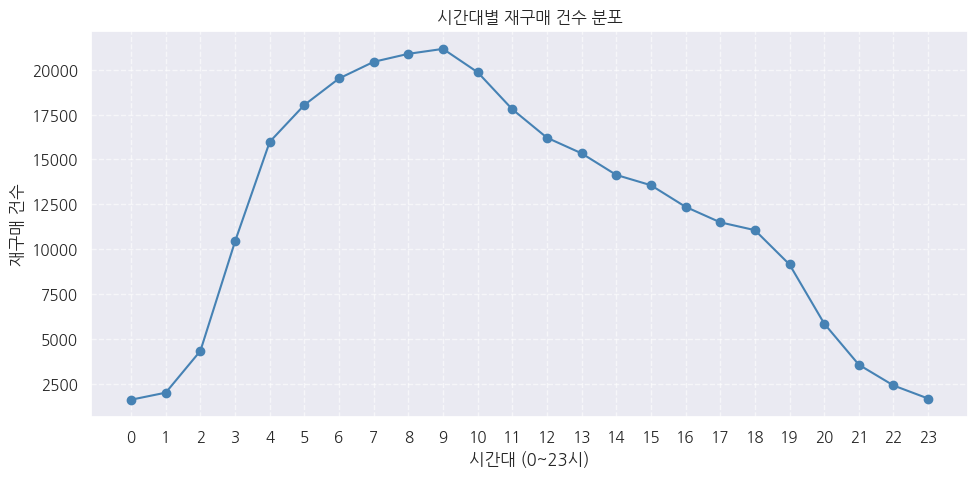

In [ ]:
# 6. 시간대별 재구매 수
hourly_repurchase = df_repurchase['event_hour'].value_counts().sort_index()

# 7. 시각화
plt.figure(figsize=(10,5))
plt.plot(hourly_repurchase.index, hourly_repurchase.values, marker='o', color='steelblue')
plt.xticks(range(0, 24))
plt.title('시간대별 재구매 건수 분포')
plt.xlabel('시간대 (0~23시)')
plt.ylabel('재구매 건수')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4
0,2019-12-01 00:00:00+00:00,view,1005105,2232732093077520756,construction.tools.light,apple,1302.48,556695836,ca5eefc5-11f9-450c-91ed-380285a0bc80,2019-12-01,0,construction,tools,light,None
1,2019-12-01 00:00:00+00:00,view,22700068,2232732091643068746,NaN,force,102.96,577702456,de33debe-c7bf-44e8-8a12-3bf8421f842a,2019-12-01,0,NaN,NaN,NaN,NaN
2,2019-12-01 00:00:01+00:00,view,2402273,2232732100769874463,appliances.personal.massager,bosch,313.52,539453785,5ee185a7-0689-4a33-923d-ba0130929a76,2019-12-01,0,appliances,personal,massager,None
3,2019-12-01 00:00:02+00:00,purchase,26400248,2053013553056579841,computers.peripherals.printer,NaN,132.31,535135317,61792a26-672f-4e61-9832-7b63bb1714db,2019-12-01,0,computers,peripherals,printer,None
4,2019-12-01 00:00:02+00:00,view,20100164,2232732110089618156,apparel.trousers,nika,101.68,517987650,906c6ca8-ff5c-419a-bde9-967ba8e2233e,2019-12-01,0,apparel,trousers,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67542873,2019-12-31 23:59:58+00:00,view,1005118,2232732093077520756,construction.tools.light,apple,908.80,515771654,06ed2ab3-39f6-4fd4-a755-3a26c72eabc8,2019-12-31,23,construction,tools,light,None
67542874,2019-12-31 23:59:58+00:00,view,1307229,2053013554658804075,electronics.audio.headphone,lenovo,1044.25,595160289,c3b5e44a-b97d-44ce-bdfc-d4f8ff669ac0,2019-12-31,23,electronics,audio,headphone,None
67542875,2019-12-31 23:59:59+00:00,view,9300104,2053013554524586339,kids.dolls,sony,411.83,526621231,7da1da5a-0d1e-4768-b481-97354e2ef28e,2019-12-31,23,kids,dolls,None,None
67542876,2019-12-31 23:59:59+00:00,view,4803759,2232732079706079299,sport.bicycle,xiaomi,17.99,574723072,2f967c6e-b6c4-4971-8599-d34f86570e29,2019-12-31,23,sport,bicycle,None,None


In [ ]:
purchase_df.groupby('user_id')['event_time'].max().reset_index()

,user_id,event_time
0,128968633,2019-12-31 15:30:09+00:00
1,136662675,2019-12-13 09:00:26+00:00
2,145611266,2019-12-24 05:09:33+00:00
3,177507559,2019-12-04 04:35:17+00:00
4,200985178,2019-12-29 23:42:08+00:00
...,...,...
500992,595334048,2019-12-31 16:54:57+00:00
500993,595334075,2019-12-31 17:00:48+00:00
500994,595334812,2019-12-31 16:55:09+00:00
500995,595334982,2019-12-31 16:59:26+00:00


In [7]:
# 기준일 설정
N = 31

# 구매 이벤트만 추출
purchase_df = df[df['event_type'] == 'purchase'].copy()

# 유저별 마지막 구매일 계산
latest_purchase = purchase_df.groupby('user_id')['event_time'].max().reset_index()

# 기준일로부터 경과일 계산
latest_purchase['days_since_last_purchase'] = (df['event_time'].max() - latest_purchase['event_time']).dt.days

# N일 이상 미구매한 고객 필터링
retarget_users = latest_purchase[latest_purchase['days_since_last_purchase'] >= N]

# 결과 출력
print(f"📌 {N}일 이상 미구매 고객 수: {len(retarget_users):,}명")


📌 31일 이상 미구매 고객 수: 0명


In [8]:
# 1. 구매 이벤트만 추출
df_purchase = df[df['event_type'] == 'purchase'].copy()

# 2. 유저별 구매 기록을 시간순 정렬
df_purchase = df_purchase.sort_values(by=['user_id', 'event_time'])

# 3. 다음 구매일 계산 (다음 구매가 없으면 NaT)
df_purchase['next_purchase'] = df_purchase.groupby('user_id')['event_time'].shift(-1)

# 4. 다음 구매까지 걸린 일 수
df_purchase['gap_days'] = (df_purchase['next_purchase'] - df_purchase['event_time']).dt.days

# 5. 다음 구매까지 30일 넘게 걸리거나, 아예 다음 구매가 없는 경우만 필터
mask = (df_purchase['gap_days'].isna()) | (df_purchase['gap_days'] > 30)
no_repurchase_users = df_purchase[mask]['user_id'].unique()

# 6. 결과 출력
print(f'📌 마지막 구매 후 30일 이상 추가 구매가 없는 유저 수: {len(no_repurchase_users):,}명')


📌 마지막 구매 후 30일 이상 추가 구매가 없는 유저 수: 359,105명


In [9]:
# 마지막 구매와 재구매 수 계산
user_repurchase_count = purchase_df.sort_values(['user_id', 'product_id', 'event_time'])
user_repurchase_count['prev_time'] = user_repurchase_count.groupby(['user_id', 'product_id'])['event_time'].shift(1)
user_repurchase_count = user_repurchase_count[user_repurchase_count['prev_time'].notnull()]

# 유저별 재구매 횟수
repurchase_cnt = user_repurchase_count.groupby('user_id').size().rename('repurchase_count')

# 병합
retarget_users = retarget_users.merge(repurchase_cnt, on='user_id', how='left').fillna(0)

# 선호 카테고리 추출 (가장 많이 구매한 category_lvl1)
user_main_category = purchase_df.groupby('user_id')['category_lvl1'] \
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

retarget_users = retarget_users.merge(user_main_category, on='user_id', how='left')

# 미리보기
retarget_users.head()


,user_id,event_time,days_since_last_purchase,repurchase_count,category_lvl1


### 건설 카테고리 구매 시간대 확인하기

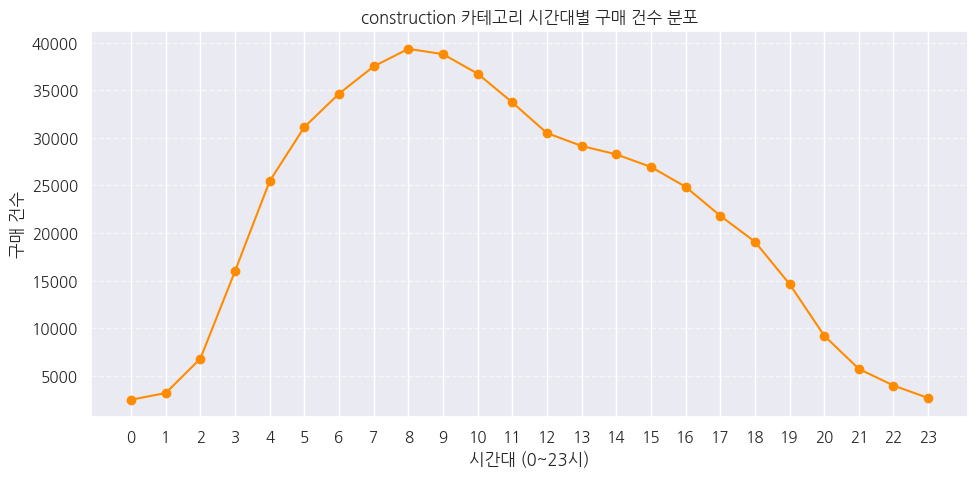

In [ ]:
# 1. 구매 + construction 카테고리만 필터
df_construction = df[
    (df['event_type'] == 'purchase') &
    (df['category_lvl1'] == 'construction')
].copy()

# 2. 구매 시간대 추출
df_construction['event_hour'] = df_construction['event_time'].dt.hour

# 3. 시간대별 건수 집계
hourly_counts = df_construction['event_hour'].value_counts().sort_index()

# 4. 시각화
plt.figure(figsize=(10,5))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', color='darkorange')
plt.title('construction 카테고리 시간대별 구매 건수 분포')
plt.xlabel('시간대 (0~23시)')
plt.ylabel('구매 건수')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [10]:
# user_id별 구매 횟수 계산
purchase_counts = purchase_df.groupby('user_id').size().reset_index(name='purchase_count')

# 정확히 1회만 구매한 유저 필터링
one_time_buyers = purchase_counts[purchase_counts['purchase_count'] == 1]

# 결과 출력
print(f"🎯 한 번만 구매한 고객 수: {len(one_time_buyers)}명")

🎯 한 번만 구매한 고객 수: 219822명


In [11]:
# 1. 구매 이벤트만 추출
purchase_df = df[df['event_type'] == 'purchase'].copy()

# 2. user_id별 구매 횟수 계산
purchase_counts = purchase_df.groupby('user_id').size().reset_index(name='purchase_count')

# 3. 정확히 1회 구매한 유저 추출
one_time_buyers = purchase_counts[purchase_counts['purchase_count'] == 1]

# 4. 구매 1회 유저의 구매 로그만 추출
one_time_purchase_df = purchase_df[purchase_df['user_id'].isin(one_time_buyers['user_id'])].copy()

# 5. user_id 중복 여부 확인
has_duplicates = one_time_purchase_df['user_id'].duplicated().any()

# 6. 결과 출력
print(f"🎯 한 번만 구매한 고객 수: {len(one_time_buyers):,}명")
print(f"✅ 중복 user_id 존재 여부: {has_duplicates}")


🎯 한 번만 구매한 고객 수: 219,822명
✅ 중복 user_id 존재 여부: False


In [12]:
one_time_purchase_df


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4
146033,2020-01-01 05:53:53+00:00,purchase,1005105,2232732093077520756,construction.tools.light,apple,1275.16,595461654,1a88068f-d832-467d-a867-b9dfdd3da7a3,2020-01-01,5,construction,tools,light,None
146115,2020-01-01 05:53:57+00:00,purchase,4600552,2053013557385101831,appliances.kitchen.dishwasher,bosch,679.53,520404769,9949d083-6c64-4188-9ce5-f90e77b4645a,2020-01-01,5,appliances,kitchen,dishwasher,None
146587,2020-01-01 05:54:23+00:00,purchase,100038678,2053013555631882655,electronics.smartphone,apple,348.79,587025007,807b3ca1-5670-4e3d-8f24-5dfed4ee46f1,2020-01-01,5,electronics,smartphone,None,None
146995,2020-01-01 05:54:45+00:00,purchase,10900328,2232732105912091273,appliances.kitchen.mixer,dauscher,15.42,594453674,cbea3fc9-b9f6-43a5-8749-a28f031e8c6b,2020-01-01,5,appliances,kitchen,mixer,None
147627,2020-01-01 05:55:17+00:00,purchase,1802005,2232732099754852875,appliances.personal.massager,lg,434.76,566691545,f30ca250-6aed-4fd3-b2fb-c2ac5845712b,2020-01-01,5,appliances,personal,massager,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55966157,2020-01-31 23:55:35+00:00,purchase,3900739,2053013557452210699,electronics.clocks,haier,77.20,516186220,5ccbe2cf-a4d7-45df-8f2c-dbec3277e140,2020-01-31,23,electronics,clocks,None,None
55966176,2020-01-31 23:55:39+00:00,purchase,1004767,2232732093077520756,construction.tools.light,samsung,226.18,608821433,492f133c-604c-4569-9734-3a94c9af6f4a,2020-01-31,23,construction,tools,light,None
55966547,2020-01-31 23:57:33+00:00,purchase,17301779,2232732098446229999,apparel.shoes.sandals,NaN,18.16,514305364,2023c66f-f447-46cc-bb37-0788783c2c7f,2020-01-31,23,apparel,shoes,sandals,None
55966604,2020-01-31 23:57:52+00:00,purchase,26300086,2053013554725912943,appliances.kitchen.coffee_grinder,lucente,237.84,514851004,0ec4ad95-7847-426f-aa1e-bb52e783dea7,2020-01-31,23,appliances,kitchen,coffee_grinder,None


In [13]:
one_time_purchase_df.to_csv('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/한번만구매한_고객데이터/one_time_purchase_users_01.csv', index=False)


In [14]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/한번만구매한_고객데이터/one_time_purchase_users_12.csv')
test2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/한번만구매한_고객데이터/one_time_purchase_users_01.csv')
df_concat = pd.concat([test, test2], ignore_index=True)
df_concat

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4
0,2019-12-01 00:00:39+00:00,purchase,1004739,2232732093077520756,construction.tools.light,xiaomi,167.29,569958205,80afff78-be88-479a-8930-83b3e6220926,2019-12-01,0,construction,tools,light,NaN
1,2019-12-01 00:02:01+00:00,purchase,1005003,2232732093077520756,construction.tools.light,huawei,227.64,555295228,3de3ac21-f446-4cf5-b3c3-06a051c5caa9,2019-12-01,0,construction,tools,light,NaN
2,2019-12-01 00:04:40+00:00,purchase,1002633,2053013555631882655,electronics.smartphone,apple,384.54,517876634,79428fc0-959b-4a17-8079-e11493c81f48,2019-12-01,0,electronics,smartphone,NaN,NaN
3,2019-12-01 00:04:44+00:00,purchase,1005115,2232732093077520756,construction.tools.light,apple,912.50,518271413,daa60361-1340-426c-89ae-fb3568819dd7,2019-12-01,0,construction,tools,light,NaN
4,2019-12-01 00:08:46+00:00,purchase,20100310,2232732110089618156,apparel.trousers,NaN,14.39,547814722,3a423f17-53a9-41a1-bdf4-6fa22999eda1,2019-12-01,0,apparel,trousers,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519969,2020-01-31 23:55:35+00:00,purchase,3900739,2053013557452210699,electronics.clocks,haier,77.20,516186220,5ccbe2cf-a4d7-45df-8f2c-dbec3277e140,2020-01-31,23,electronics,clocks,NaN,NaN
519970,2020-01-31 23:55:39+00:00,purchase,1004767,2232732093077520756,construction.tools.light,samsung,226.18,608821433,492f133c-604c-4569-9734-3a94c9af6f4a,2020-01-31,23,construction,tools,light,NaN
519971,2020-01-31 23:57:33+00:00,purchase,17301779,2232732098446229999,apparel.shoes.sandals,NaN,18.16,514305364,2023c66f-f447-46cc-bb37-0788783c2c7f,2020-01-31,23,apparel,shoes,sandals,NaN
519972,2020-01-31 23:57:52+00:00,purchase,26300086,2053013554725912943,appliances.kitchen.coffee_grinder,lucente,237.84,514851004,0ec4ad95-7847-426f-aa1e-bb52e783dea7,2020-01-31,23,appliances,kitchen,coffee_grinder,NaN


In [15]:
df_concat.to_csv('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/한번만구매한_고객데이터/one_time_buyers_201912_202001.csv', index=False)